In [153]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
df.drop('customerID', axis = 1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [156]:
df = df.dropna()

In [157]:
cat_cols = []
num_cols = []
for col in df:
  if df[col].dtype == 'object':
    print(f'{col}, values : {df[col].unique()}')
    cat_cols.append(col)
  else:
    num_cols.append(col)

gender, values : ['Female' 'Male']
Partner, values : ['Yes' 'No']
Dependents, values : ['No' 'Yes']
PhoneService, values : ['No' 'Yes']
MultipleLines, values : ['No phone service' 'No' 'Yes']
InternetService, values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity, values : ['No' 'Yes' 'No internet service']
OnlineBackup, values : ['Yes' 'No' 'No internet service']
DeviceProtection, values : ['No' 'Yes' 'No internet service']
TechSupport, values : ['No' 'Yes' 'No internet service']
StreamingTV, values : ['No' 'Yes' 'No internet service']
StreamingMovies, values : ['No' 'Yes' 'No internet service']
Contract, values : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, values : ['Yes' 'No']
PaymentMethod, values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, values : ['No' 'Yes']


In [158]:
print(num_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [159]:
duplicates_col = ['MultipleLines','StreamingMovies','StreamingTV', 'TechSupport','OnlineSecurity','DeviceProtection','OnlineBackup']
df[duplicates_col] = df[duplicates_col].replace('No internet service', 'No')
df['InternetService'] = df['InternetService'].replace('No internet service', 'No')

In [160]:
for col in df:
  if df[col].dtype == 'object':
    print(f'{col}, values : {df[col].unique()}')
    cat_cols.append(col)
  else:
    num_cols.append(col)

gender, values : ['Female' 'Male']
Partner, values : ['Yes' 'No']
Dependents, values : ['No' 'Yes']
PhoneService, values : ['No' 'Yes']
MultipleLines, values : ['No phone service' 'No' 'Yes']
InternetService, values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity, values : ['No' 'Yes']
OnlineBackup, values : ['Yes' 'No']
DeviceProtection, values : ['No' 'Yes']
TechSupport, values : ['No' 'Yes']
StreamingTV, values : ['No' 'Yes']
StreamingMovies, values : ['No' 'Yes']
Contract, values : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, values : ['Yes' 'No']
PaymentMethod, values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, values : ['No' 'Yes']


In [161]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)
print(df[cat_cols])

      gender  Partner  Dependents  ...  PaperlessBilling  PaymentMethod  Churn
0          0        1           0  ...                 1              2      0
1          1        0           0  ...                 0              3      0
2          1        0           0  ...                 1              3      1
3          1        0           0  ...                 0              0      0
4          0        0           0  ...                 1              2      1
...      ...      ...         ...  ...               ...            ...    ...
7038       1        1           1  ...                 1              3      0
7039       0        1           1  ...                 1              1      0
7040       0        1           1  ...                 1              2      0
7041       1        1           0  ...                 1              3      1
7042       1        0           0  ...                 1              0      0

[7032 rows x 32 columns]


In [162]:
for col in df:
  print(f'{col}, values : {df[col].unique()}')

gender, values : [0 1]
SeniorCitizen, values : [0 1]
Partner, values : [1 0]
Dependents, values : [0 1]
tenure, values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService, values : [0 1]
MultipleLines, values : [1 0 2]
InternetService, values : [0 1 2]
OnlineSecurity, values : [0 1]
OnlineBackup, values : [1 0]
DeviceProtection, values : [0 1]
TechSupport, values : [0 1]
StreamingTV, values : [0 1]
StreamingMovies, values : [0 1]
Contract, values : [0 1 2]
PaperlessBilling, values : [1 0]
PaymentMethod, values : [2 3 0 1]
MonthlyCharges, values : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges, values : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn, values : [0 1]


In [163]:
from sklearn.preprocessing import MinMaxScaler

df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

In [164]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [166]:
model_1 = keras.Sequential([
    keras.layers.Dense(30, input_shape = (19,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1.fit(X_train, y_train, epochs = 150)

Epoch 1/150
176/176 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7083
Epoch 2/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7774
Epoch 3/150
176/176 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.7845
Epoch 4/150
176/176 [==============================] - 1s 5ms/step - loss: 0.4337 - accuracy: 0.7888
Epoch 5/150
176/176 [==============================] - 1s 5ms/step - loss: 0.4298 - accuracy: 0.7940
Epoch 6/150
176/176 [==============================] - 1s 6ms/step - loss: 0.4257 - accuracy: 0.7947
Epoch 7/150
176/176 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.7929
Epoch 8/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8005
Epoch 9/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8012
Epoch 10/150
176/176 [==============================] - 1s 4ms/step - loss: 0.4189 - accura

In [167]:
model_1_params = model_1.evaluate(X_test, y_test)
y_model_1 = model_1.predict(X_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7889


In [168]:
model_2 = keras.Sequential([
    keras.layers.Dense(30, input_shape = (19,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs = 150)

Epoch 1/150
176/176 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.6932
Epoch 2/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7460
Epoch 3/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7678
Epoch 4/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7735
Epoch 5/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7742
Epoch 6/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7799
Epoch 7/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7831
Epoch 8/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7844
Epoch 9/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7838
Epoch 10/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4380 - accura

In [169]:
model_2_params = model_2.evaluate(X_test, y_test)
y_model_2 = model_2.predict(X_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8031


In [170]:
y_preds_model_1 = []

for y in y_model_1:
  if y > 0.5:
    y_preds_model_1.append(1)
  else:
    y_preds_model_1.append(0)

In [171]:
y_preds_model_2 = []

for y in y_model_2:
  if y > 0.5:
    y_preds_model_2.append(1)
  else:
    y_preds_model_2.append(0)

In [172]:
from sklearn.metrics import classification_report
#Resulting in a low f1 score for the class with label 1 since that the dataset used in imbalanded/need more data.

print(classification_report(y_test,y_preds_model_1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1059
           1       0.59      0.49      0.54       348

    accuracy                           0.79      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [173]:
print(classification_report(y_test,y_preds_model_2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1059
           1       0.63      0.49      0.55       348

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



Text(69.0, 0.5, 'Truth')

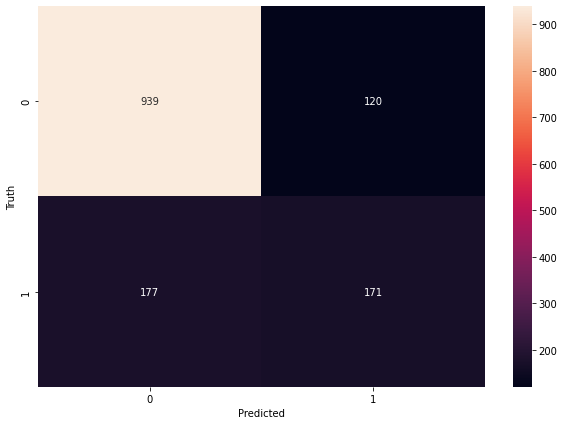

In [174]:
#Confusion matrix for model 1
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_preds_model_1)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

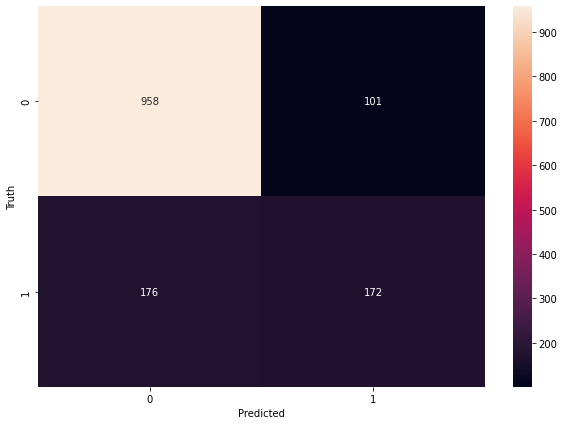

In [175]:
#Confusion matrix for model 2
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_preds_model_2)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

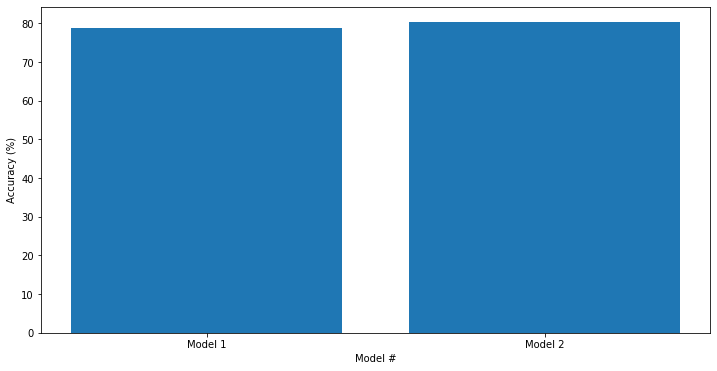

In [176]:
#Bar plot graph showing the accuracy of each model on the test set.

plt.figure(figsize= (12, 6))
plt.bar(['Model 1', 'Model 2'], [model_1_params[1] * 100, model_2_params[1] * 100])
plt.xlabel('Model #')
plt.ylabel('Accuracy (%)')

plt.show()
